**This requires > the standard 2GB of memory in docker. It worked with 4GB.**

In [1]:
import pandas as pd
from ebmdatalab import bq
from lib.outliers import *
from lib.generate_measure_sql import get_measure_json, build_sql
from change_detection import functions as chg

## Load data

In [2]:
with open("../data/static_outlier_sql/chem_per_para.sql") as sql:
    query = sql.read()
#chem_per_para = bq.cached_read(query, csv_path='data/chem_per_para.zip')

## reload specifying data type currently required
## due to https://github.com/ebmdatalab/datalab-pandas/issues/26
chem_per_para = pd.read_csv('../data/chem_per_para.zip', dtype={'subpara': str})
chem_per_para.head()

,practice,pcn,ccg,chemical,subpara,numerator
0,C83009,U58704,04D,1001040C0,1001040,712
1,H81069,U67032,10C,0601021M0,0601021,406
2,M83096,U91937,05G,0307000J0,0307000,302
3,A83030,U01989,00J,0202020D0,0202020,148
4,N81117,U85986,02F,0906026M0,0906026,235


In [3]:
## When not using cached data, this needs to be run first time
## after set up of docker environment (to authenticate BigQuery)
#from ebmdatalab import bq
#bq.cached_read("nothing",csv_path="nothing")

In [9]:
measures = ["desogestrel", "trimethoprim",]
run_name = "practice_change_detection"
get_measure_json(measures, run_name)
build_sql(run_name)

desogestrel
trimethoprim


In [10]:
change = chg.ChangeDetection(
    name=run_name,
    measure=True,
    custom_measure=True,
    direction="down",
    use_cache=True,
    overwrite=False,
    verbose=False,
    draw_figures="no")
change.run()

Downloading: 100%|██████████| 771790/771790 [00:49<00:00, 15637.93rows/s]


In [11]:
measure_changes = change.concatenate_outputs()
measure_changes.head()

is.nbreak  is.tfirst  is.tfirst.pknown  \
measure     name                                             
desogestrel A81001          2       43.0              43.0   
            A81002          2       43.0              43.0   
            A81004          2       40.0              40.0   
            A81005          4       47.0              47.0   
            A81006          1       30.0              30.0   

                    is.tfirst.pknown.offs  is.tfirst.offs  is.tfirst.big  \
measure     name                                                           
desogestrel A81001                    inf             inf           43.0   
            A81002                   43.0            43.0           43.0   
            A81004                   40.0            40.0           40.0   
            A81005                   47.0            47.0           47.0   
            A81006                   30.0            30.0           30.0   

                    is.slope.ma  is.slope.ma.prop  is.slope.ma.prop.lev  \
measure     name                                                          
desogestrel A81001    -0.016124         -0.016384              0.552151   
            A81002    -0.001805         -0.002168              0.507042   
            A81004    -0.043048         -0.047070              0.500241   
            A81005    -0.059793         -0.110843              0.538948   
            A81006    -0.002988         -0.003047              0.511905   

                    is.intlev.initlev  is.intlev.finallev  is.intlev.levd  \
measure     name                                                            
desogestrel A81001           1.000206            0.971004        0.029202   
            A81002           0.834401            0.706252        0.128149   
            A81004           0.957583            0.269154        0.688429   
            A81005           0.981999            0.003198        0.978801   
            A81006           0.983569            0.732596        0.250973   

                    is.intlev.levdprop  
measure     name                        
desogestrel A81001            0.029196  
            A81002            0.153582  
            A81004            0.718924  
            A81005            0.996743  
            A81006            0.255166

In [17]:
import glob
pathname = f"data/{run_name}/**/bq_cache.csv"
glob.glob(pathname, recursive=True)

['data/practice_change_detection/desogestrel/bq_cache.csv',
 'data/practice_change_detection/trimethoprim/bq_cache.csv']

,Month when change detected,Measured proportional change,plots
link,,,
NEWHAM MEDICAL CENTRE,51.0,0.999846,
3D MEDICAL CENTRE,64.0,0.999029,
BROUGHTON CORNER MEDICAL CENTRE,60.0,0.998997,
PEARTREE MEDICAL CENTRE,2.0,0.997517,
THE BAILEY PRACTICE,55.0,0.997218,
HIGH ROAD SURGERY,21.0,0.996790,
DR ME SHEIKH'S PRACTICE,76.0,0.995612,
STOKE ALDERMOOR MED CTRE,88.0,0.994746,
THE SUMMITT PRACTICE,20.0,0.994620,

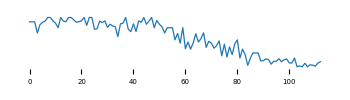
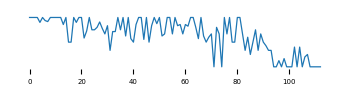
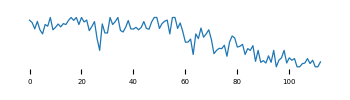
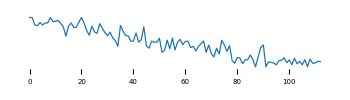
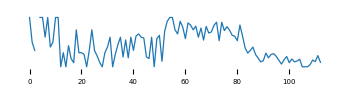
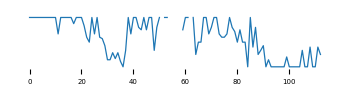
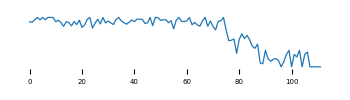
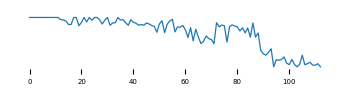
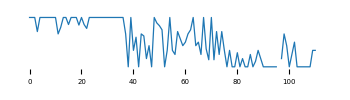
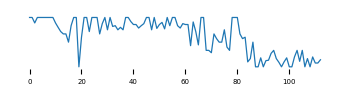

In [12]:

sparkline_table(
    trimethoprim,
    'practice_change_detection/trimethoprim',
    'trimethoprim'
)

## Generate HTML for practices, CCGs etc

In [8]:
#loop_over_everything(chem_per_para, ['practice','pcn','ccg',])